In [10]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import pandas as pd
import numpy as np
import copy
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]

plt.rc('font', size=14) 

In [13]:
ticker = yfinance.Ticker('INFY')
df = ticker.history(interval="1d",start="2018-07-01",end="2021-07-01")

In [14]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [15]:
df

,Date,Open,High,Low,Close
Date,,,,,
2018-07-02 00:00:00-04:00,736877.166667,8.703555,8.820260,8.699066,8.802306
2018-07-03 00:00:00-04:00,736878.166667,8.887590,8.914523,8.802305,8.838215
2018-07-05 00:00:00-04:00,736880.166667,8.519519,8.694578,8.488098,8.681111
2018-07-06 00:00:00-04:00,736881.166667,8.582362,8.627248,8.541963,8.595827
2018-07-09 00:00:00-04:00,736884.166667,8.645203,8.725999,8.631736,8.708044
...,...,...,...,...,...
2021-06-24 00:00:00-04:00,737965.166667,20.705566,20.802548,20.550396,20.550396
2021-06-25 00:00:00-04:00,737966.166667,20.783152,20.860738,20.492207,20.608585
2021-06-28 00:00:00-04:00,737969.166667,20.724964,20.851039,20.560095,20.647379


In [16]:
def isSupport(df,i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]

  return support

def isResistance(df,i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 

  return resistance

In [17]:
levels = []
support_levels  = []
resistance_levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i]))
    support_levels.append((i,df['Low'][i]))
  elif isResistance(df,i):
    levels.append((i,df['High'][i]))
    resistance_levels.append((i,df['High'][i]))

In [18]:
NUM_BEFORE = 3
NUM_AFTER = 3

def pivotId(df, candle, num_before, num_after):
    if candle-num_before < 0 or candle+num_after >= len(df):
        return 0
    
    pivotIdLow=1
    pivotIdHigh=1
    for i in range(candle-num_before, candle+num_after):
        if(df.Low[candle]>df.Low[i]):
            pivotIdLow=0
        if(df.High[candle]<df.High[i]):
            pivotIdHigh=0
    if pivotIdLow and pivotIdHigh:
        return 3
    elif pivotIdLow:
        return 1
    elif pivotIdHigh:
        return 2
    else:
        return 0

'df[\'Pivot\'] = df.apply(lambda row: pivotId(df, int(row.Id)-1, NUM_BEFORE, NUM_AFTER), axis=1)\n\ndef pointPosition(x):\n    if x[\'Pivot\']==1:\n        return x[\'Low\']-(0.01*df.High.max())\n    elif x[\'Pivot\']==2:\n        return x[\'High\']+(0.01*df.High.max())\n    else:\n        return np.nan\n\ndf[\'PointPosition\'] = df.apply(lambda row: pointPosition(row), axis=1)\npd.set_option("display.max_rows", None, "display.max_columns", None)\ndisplay(df)'

In [19]:
pivots = []
support_pivots  = []
resistance_pivots = []
for i in range(6,df.shape[0]-6):
  if pivotId(df,i,NUM_BEFORE,NUM_AFTER) == 1:
    pivots.append((i,df['Low'][i]))
    support_pivots.append((i,df['Low'][i]))
  elif pivotId(df,i,NUM_BEFORE,NUM_AFTER) == 2:
    pivots.append((i,df['High'][i]))
    resistance_pivots.append((i,df['High'][i]))

In [20]:
def plot_all(levels):
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()

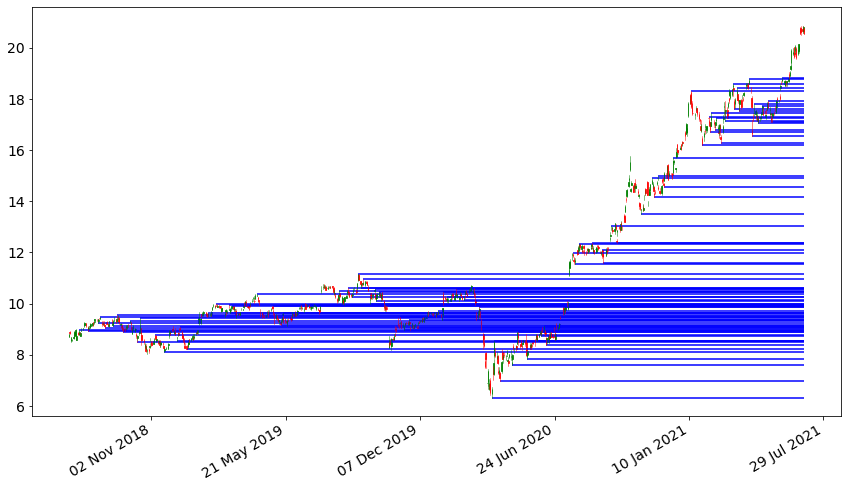

In [21]:
plot_all(levels)

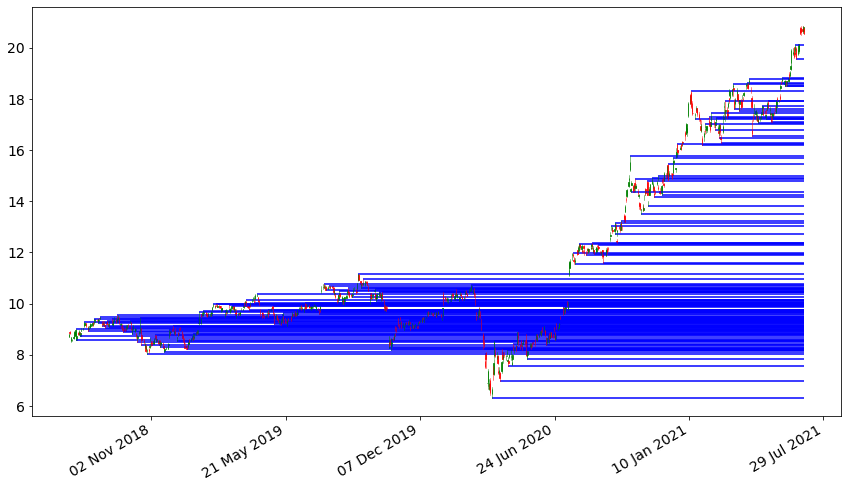

In [42]:
plot_all(pivots)

In [22]:
def plot_supports_resistances(support_levels,resistance_levels):
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for support_level in support_levels:
    plt.hlines(support_level[1],xmin=df['Date'][support_level[0]],\
               xmax=max(df['Date']),colors='blue')
    
  for resistance_level in resistance_levels:
    plt.hlines(resistance_level[1],xmin=df['Date'][resistance_level[0]],\
               xmax=max(df['Date']),colors='orange')
  fig.show()

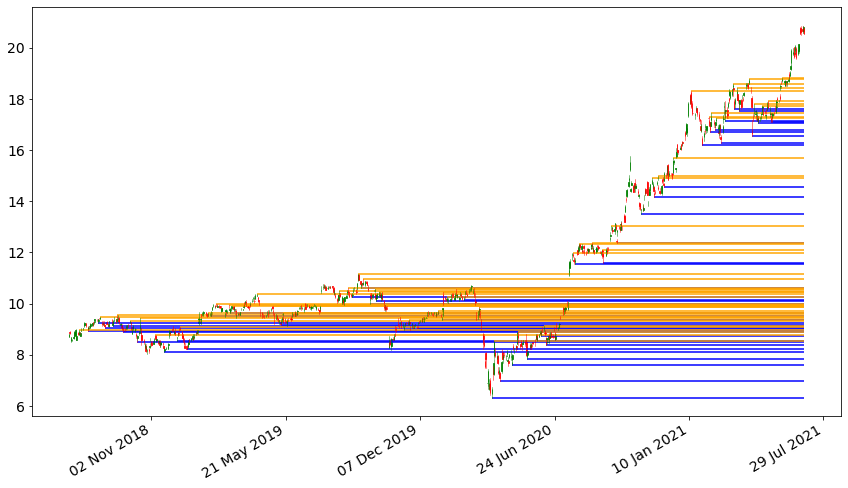

In [23]:
plot_supports_resistances(support_levels,resistance_levels)

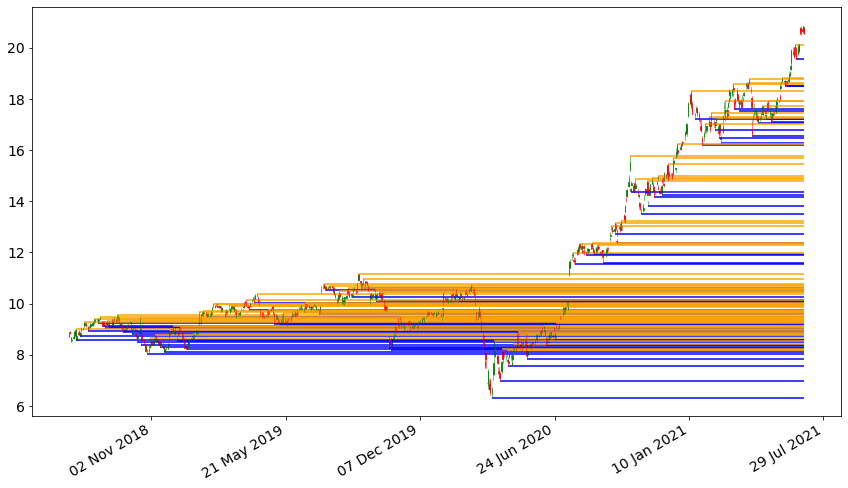

In [43]:
plot_supports_resistances(support_pivots,resistance_pivots)

In [27]:
s =  np.mean(df['High'] - df['Low'])

In [28]:
def assign_strength_remove_noise(lis):

  updatedLis = []
  newLis = copy.deepcopy(lis)
  lisSorted = copy.deepcopy(lis)
  lisSorted.sort(key=lambda a: a[1])

  counter = 0
  for i in lisSorted:
    counter = counter + 1
  len2 = counter

  blacklisted = []
  blacklisted.append(0)

  for i in range(len2):
    if not(lisSorted[i][0] in blacklisted):
      cnt = 0
      while(abs(lisSorted[i][1]-lisSorted[i+cnt][1]) <= s):
        if((i+cnt+1) < len2):
          cnt = cnt+1
        else:
          break
      max = i
      if cnt>1:
        for j in range(1,cnt):
          if (lisSorted[i+j][0] >= lisSorted[max][0]):
            blacklisted.append(lisSorted[max][0])
            max = i+j
      updatedLis.append((lisSorted[max][0],lisSorted[max][1],cnt))
  updatedLis.sort(key=lambda a: a[0])
  return updatedLis

In [29]:
new_support_levels = assign_strength_remove_noise(support_levels)
new_support_levels

[(121, 8.228754596268619, 2),
 (164, 9.641821067581393, 2),
 (164, 9.641821067581393, 1),
 (216, 9.158360909342306, 4),
 (290, 10.249390044843105, 1),
 (299, 10.628653370837581, 1),
 (358, 9.036505018171727, 5),
 (358, 9.036505018171727, 4),
 (358, 9.036505018171727, 4),
 (404, 10.14148869275344, 3),
 (404, 10.14148869275344, 2),
 (417, 9.354890830979627, 4),
 (417, 9.354890830979627, 3),
 (417, 9.354890830979627, 2),
 (433, 6.330236485807042, 1),
 (442, 6.985734237226748, 1),
 (453, 7.585046657239053, 1),
 (470, 7.83788244257288, 1),
 (480, 8.526937878954577, 3),
 (484, 8.716846751307878, 3),
 (484, 8.716846751307878, 2),
 (484, 8.716846751307878, 2),
 (489, 8.394001042376686, 2),
 (489, 8.394001042376686, 4),
 (549, 11.584480992060934, 2),
 (549, 11.584480992060934, 1),
 (562, 12.363111570171533, 1),
 (588, 13.48522101513686, 1),
 (602, 14.166680829842509, 1),
 (611, 14.560199279149288, 1),
 (661, 16.777341928300753, 2),
 (661, 16.777341928300753, 1),
 (668, 16.25904950771668, 2),
 (

In [30]:
new_resistance_levels = assign_strength_remove_noise(resistance_levels)
new_resistance_levels

[(150, 9.97932994535265, 1),
 (162, 9.961087649976289, 2),
 (219, 9.63269908139836, 4),
 (237, 9.94284367303328, 5),
 (237, 9.94284367303328, 3),
 (286, 10.591651987488518, 1),
 (296, 11.174424093431492, 1),
 (302, 10.980166824408903, 2),
 (313, 10.563901584954053, 2),
 (341, 9.47662617777268, 5),
 (341, 9.47662617777268, 5),
 (350, 9.345525042998673, 5),
 (350, 9.345525042998673, 4),
 (379, 9.692004677149722, 3),
 (379, 9.692004677149722, 2),
 (388, 10.244493870511672, 3),
 (396, 10.55351623512297, 6),
 (396, 10.55351623512297, 5),
 (396, 10.55351623512297, 4),
 (396, 10.55351623512297, 3),
 (436, 8.549564490763785, 1),
 (460, 8.90540636905375, 3),
 (460, 8.90540636905375, 3),
 (486, 9.10616103831865, 3),
 (486, 9.10616103831865, 1),
 (506, 9.87529420114345, 3),
 (506, 9.87529420114345, 6),
 (537, 12.372605615280571, 2),
 (537, 12.372605615280571, 1),
 (547, 12.106732285405293, 2),
 (547, 12.106732285405293, 1),
 (556, 13.046782923251685, 1),
 (605, 14.972915118519449, 2),
 (605, 14.9

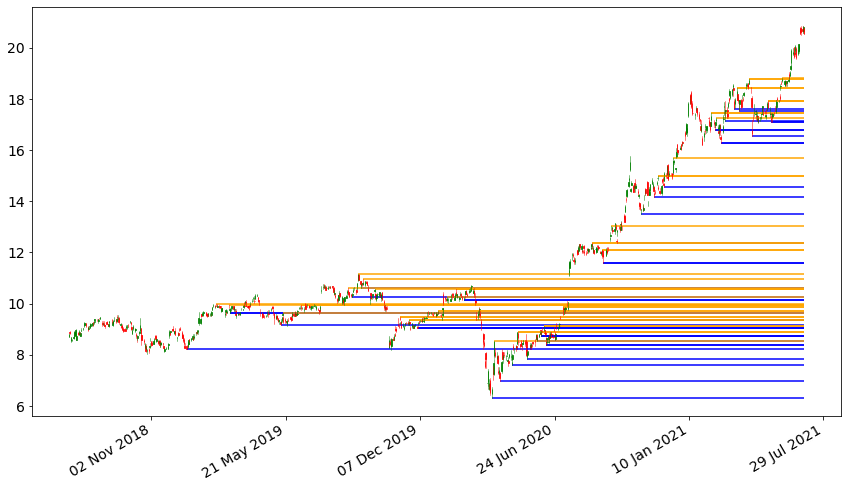

In [31]:
plot_supports_resistances(new_support_levels,new_resistance_levels)

In [32]:
new_levels = assign_strength_remove_noise(levels)
new_levels

[(121, 8.228754596268619, 2),
 (216, 9.158360909342306, 4),
 (219, 9.63269908139836, 6),
 (296, 11.174424093431492, 1),
 (299, 10.628653370837581, 2),
 (299, 10.628653370837581, 1),
 (302, 10.980166824408903, 2),
 (308, 9.999630142313354, 6),
 (313, 10.563901584954053, 3),
 (341, 9.47662617777268, 7),
 (341, 9.47662617777268, 7),
 (379, 9.692004677149722, 5),
 (379, 9.692004677149722, 3),
 (379, 9.692004677149722, 2),
 (384, 10.441143643668903, 3),
 (388, 10.244493870511672, 4),
 (396, 10.55351623512297, 6),
 (396, 10.55351623512297, 6),
 (396, 10.55351623512297, 5),
 (396, 10.55351623512297, 4),
 (404, 10.14148869275344, 5),
 (404, 10.14148869275344, 4),
 (404, 10.14148869275344, 3),
 (417, 9.354890830979627, 6),
 (417, 9.354890830979627, 6),
 (417, 9.354890830979627, 5),
 (433, 6.330236485807042, 1),
 (442, 6.985734237226748, 1),
 (453, 7.585046657239053, 1),
 (460, 8.90540636905375, 6),
 (460, 8.90540636905375, 7),
 (460, 8.90540636905375, 7),
 (470, 7.83788244257288, 1),
 (480, 8.5

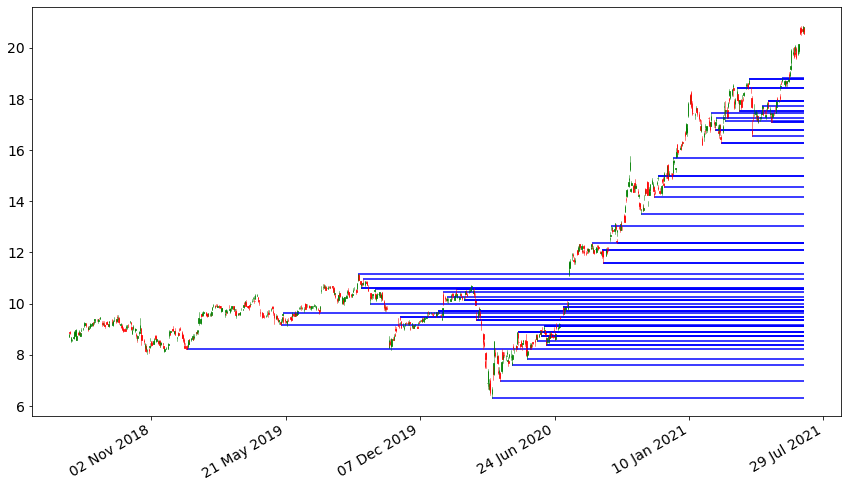

In [33]:
plot_all(new_levels)

In [45]:
new_pivots = assign_strength_remove_noise(pivots)
new_pivots

[(261, 10.767408360222545, 1),
 (290, 10.249390044843105, 2),
 (296, 11.174424093431492, 1),
 (302, 10.980166824408903, 2),
 (341, 9.47662617777268, 5),
 (375, 9.682639106523935, 6),
 (376, 9.476625924464305, 12),
 (376, 9.476625924464305, 12),
 (376, 9.476625924464305, 11),
 (376, 9.476625924464305, 9),
 (376, 9.476625924464305, 8),
 (376, 9.476625924464305, 6),
 (379, 9.692004677149722, 11),
 (384, 10.441143643668903, 3),
 (396, 10.55351623512297, 8),
 (396, 10.55351623512297, 7),
 (399, 10.094665563363233, 14),
 (400, 10.450509337408425, 9),
 (400, 10.450509337408425, 9),
 (404, 10.14148869275344, 15),
 (404, 10.14148869275344, 13),
 (404, 10.14148869275344, 9),
 (404, 10.14148869275344, 7),
 (404, 10.14148869275344, 5),
 (404, 10.14148869275344, 3),
 (412, 10.712708607171509, 7),
 (412, 10.712708607171509, 5),
 (412, 10.712708607171509, 5),
 (412, 10.712708607171509, 3),
 (412, 10.712708607171509, 2),
 (417, 9.354890830979627, 12),
 (417, 9.354890830979627, 16),
 (417, 9.3548908309

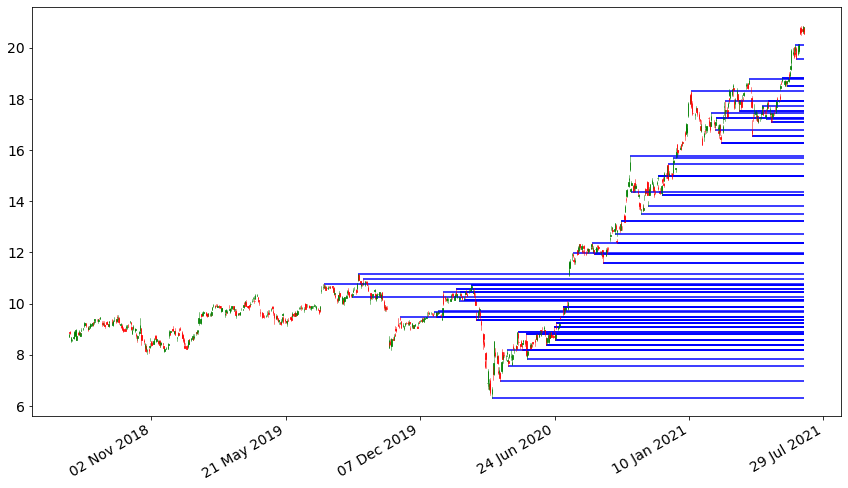

In [46]:
plot_all(new_pivots)

In [34]:
def isFarFromLevel(l):
  return np.sum([abs(l-x) < s  for x in levels]) == 0

In [44]:
levels = []
for i in range(2,df.shape[0]-2):
  if isSupport(df,i):
    l = df['Low'][i]

    if isFarFromLevel(l):
      levels.append((i,l))

  elif isResistance(df,i):
    l = df['High'][i]

    if isFarFromLevel(l):
      levels.append((i,l))

In [36]:
levels

[(10, 8.950433091894988),
 (31, 9.24668618738536),
 (33, 9.489074800378889),
 (71, 8.492587951593627),
 (100, 8.119883248415595),
 (192, 10.38069301326255),
 (286, 10.591651987488518),
 (296, 11.174424093431492),
 (379, 9.692004677149722),
 (433, 6.330236485807042),
 (442, 6.985734237226748),
 (453, 7.585046657239053),
 (470, 7.83788244257288),
 (484, 8.716846751307878),
 (516, 11.992787891159729),
 (519, 11.546498815350281),
 (523, 12.334624174532701),
 (556, 13.046782923251685),
 (588, 13.48522101513686),
 (599, 14.905726887367333),
 (602, 14.166680829842509),
 (611, 14.560199279149288),
 (621, 15.692766075346805),
 (638, 18.303428426483467),
 (649, 16.201459884643555),
 (655, 17.28603785456037),
 (657, 16.71975330155089),
 (680, 18.59136766402768),
 (682, 17.612368074949902),
 (707, 17.055686949492355),
 (717, 17.900307959171926),
 (732, 18.824123837567768)]

In [37]:
counter = 0
for i in levels:
    counter = counter + 1
len1 = counter
len1

32

In [38]:
x = df[df.columns[0]].count()

def levelsDaysMapping(x):
  mapping = []
  c = 0
  j = 0
  while(j <= levels[c][0]):
    mapping.append((j,-1))
    j = j + 1    
  for i in range(j,x):
    if ((c+1)<len1):
      if (i > levels[c+1][0]):
        c = c + 1
      mapping.append((i,levels[c][0]))
  return mapping
newMapping = []
newMapping = levelsDaysMapping(x)
newMapping

[(0, -1),
 (1, -1),
 (2, -1),
 (3, -1),
 (4, -1),
 (5, -1),
 (6, -1),
 (7, -1),
 (8, -1),
 (9, -1),
 (10, -1),
 (11, 10),
 (12, 10),
 (13, 10),
 (14, 10),
 (15, 10),
 (16, 10),
 (17, 10),
 (18, 10),
 (19, 10),
 (20, 10),
 (21, 10),
 (22, 10),
 (23, 10),
 (24, 10),
 (25, 10),
 (26, 10),
 (27, 10),
 (28, 10),
 (29, 10),
 (30, 10),
 (31, 10),
 (32, 31),
 (33, 31),
 (34, 33),
 (35, 33),
 (36, 33),
 (37, 33),
 (38, 33),
 (39, 33),
 (40, 33),
 (41, 33),
 (42, 33),
 (43, 33),
 (44, 33),
 (45, 33),
 (46, 33),
 (47, 33),
 (48, 33),
 (49, 33),
 (50, 33),
 (51, 33),
 (52, 33),
 (53, 33),
 (54, 33),
 (55, 33),
 (56, 33),
 (57, 33),
 (58, 33),
 (59, 33),
 (60, 33),
 (61, 33),
 (62, 33),
 (63, 33),
 (64, 33),
 (65, 33),
 (66, 33),
 (67, 33),
 (68, 33),
 (69, 33),
 (70, 33),
 (71, 33),
 (72, 71),
 (73, 71),
 (74, 71),
 (75, 71),
 (76, 71),
 (77, 71),
 (78, 71),
 (79, 71),
 (80, 71),
 (81, 71),
 (82, 71),
 (83, 71),
 (84, 71),
 (85, 71),
 (86, 71),
 (87, 71),
 (88, 71),
 (89, 71),
 (90, 71),
 (91, 71)

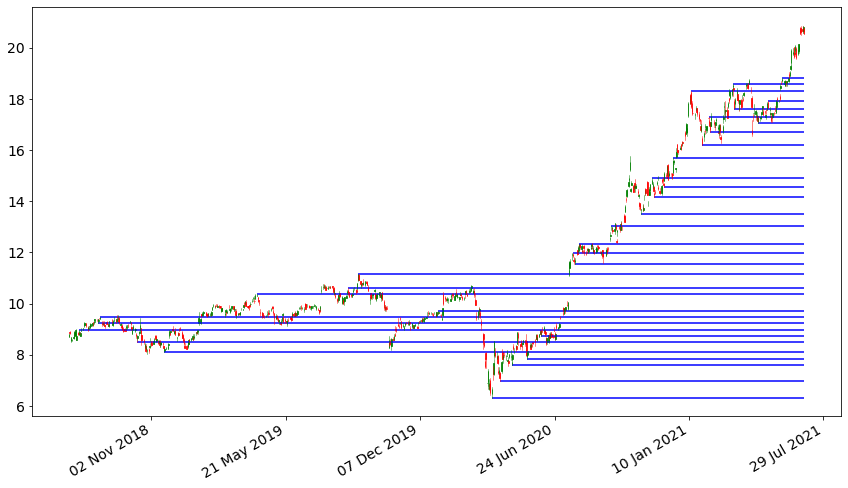

In [39]:
plot_all(levels)

In [40]:
#segregating suports and resistances
support_levels2 = []
resistance_levels2 = []
for i in range(0,len1):
  if levels[i][1] == df['Low'][levels[i][0]]:
    support_levels2.append((levels[i][0],levels[i][1]))
  else:
    resistance_levels2.append((levels[i][0],levels[i][1]))
#print(support_levels)
#print(resistance_levels)

def plot_new_supports_resistances():
  fig, ax = plt.subplots()

  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)

  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()

  fig.tight_layout()

  for support_level in support_levels2:
    plt.hlines(support_level[1],xmin=df['Date'][support_level[0]],\
               xmax=max(df['Date']),colors='blue')
    
  for resistance_level in resistance_levels2:
    plt.hlines(resistance_level[1],xmin=df['Date'][resistance_level[0]],\
               xmax=max(df['Date']),colors='orange')
  fig.show()

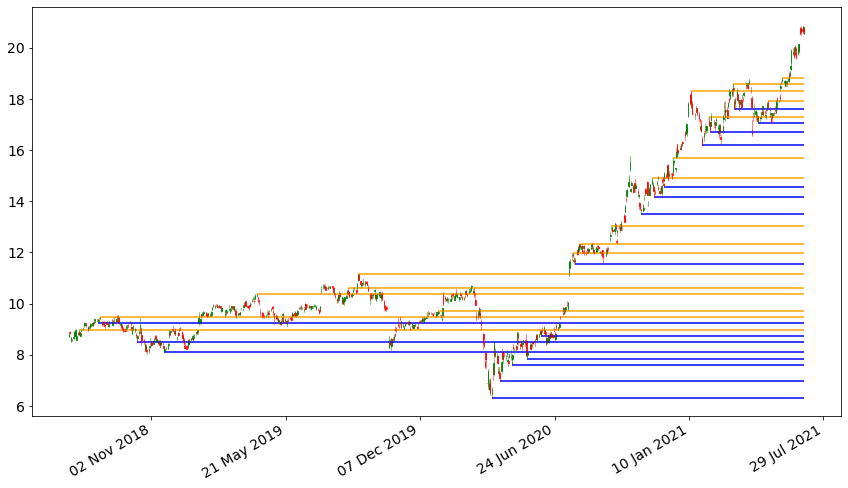

In [41]:
plot_new_supports_resistances()